<h1> ~Neural Collaborative Filtering -  Implementation with Keras </h>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

**Define dataset folder and files**

In [2]:
RATING_DATA_FILE_TRAIN = 'u1.base'
RATING_DATA_FILE_TEST = 'u1.test'
MOVIES_DATA_FILE_PATH = 'u.item'
USERS_DATA_FILE_PATH = 'u.user'

In [3]:
# lets explore movies.csv
m_cols = ['movie_id','movie title','release date','video release date','IMDb URL'
          ,'unknown','Action','Adventure','Animation','Childrens','Comedy',
          'Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi',
        'Thriller','War','Western']
data= pd.read_csv('d:/documents/users/ravedan/Downloads/ml-100k/u.item',delimiter='|',names=m_cols,encoding='latin-1')
data.shape

(1682, 24)

In [4]:
#explore users
u_cols = ['user_id','age','gender','occupation','zip_code']
data_u = pd.read_csv('d:/documents/users/ravedan/Downloads/ml-100k/u.user',delimiter='|',names=u_cols,encoding='latin-1')
data_u.shape

(943, 5)

In [50]:
r_cols = ['user_id','movie_id','rating','timestamp']
data_r = pd.read_csv('d:/documents/users/ravedan/Downloads/ml-100k/u1.base',delimiter='\t',names=r_cols,encoding='latin-1')
data_r.shape
print(data_r)

       user_id  movie_id  rating  timestamp
0            1         1       5  874965758
1            1         2       3  876893171
2            1         3       4  878542960
3            1         4       3  876893119
4            1         5       3  889751712
5            1         7       4  875071561
6            1         8       1  875072484
7            1         9       5  878543541
8            1        11       2  875072262
9            1        13       5  875071805
10           1        15       5  875071608
11           1        16       5  878543541
12           1        18       4  887432020
13           1        19       5  875071515
14           1        21       1  878542772
15           1        22       4  875072404
16           1        25       4  875071805
17           1        26       3  875072442
18           1        28       4  875072173
19           1        29       1  878542869
20           1        30       3  878542515
21           1        32       5

Histogram


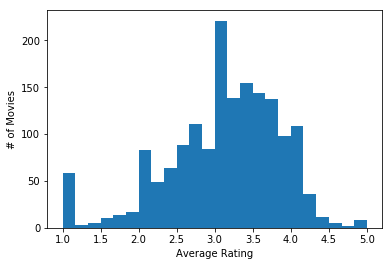

   movie_id                                 movie title  rating
0      1500                   Santa with Muscles (1996)     5.0
1      1201  Marlene Dietrich: Shadow and Light (1996)      5.0
2      1293                             Star Kid (1997)     5.0


In [6]:
# 1.1
dataRating=data.merge(data_r,on = 'movie_id',how = 'inner')
averageMovieRating = dataRating.groupby(['movie_id', 'movie title'])['rating'].mean().sort_values(ascending=False).reset_index()

print('Histogram')
plt.hist(averageMovieRating['rating'],bins='auto')
plt.xlabel('Average Rating')
plt.ylabel('# of Movies')


plt.show()

bestRating = averageMovieRating.head(3)
print(bestRating)

In [7]:
#1.2

merged_data=dataRating.merge(data_u,on = 'user_id', how='inner')

femaleData = merged_data.loc[merged_data['gender'] == 'F']
maleData = merged_data.loc[merged_data['gender'] == 'M']


Histogram


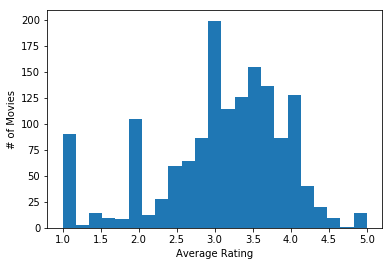

   movie_id                            movie title gender  ratingFemale
0      1472  Visitors, The (Visiteurs, Les) (1993)      F           5.0
1      1594                         Everest (1998)      F           5.0
2      1599          Someone Else's America (1995)      F           5.0


In [8]:
#female
averageMovieRatingFemale = femaleData.groupby(['movie_id','movie title','gender'])['rating'].mean().sort_values(ascending=False).reset_index()

averageMovieRatingFemale.columns = ['movie_id','movie title','gender', 'ratingFemale']
print('Histogram')
plt.hist(averageMovieRatingFemale['ratingFemale'],bins='auto')
plt.xlabel('Average Rating')
plt.ylabel('# of Movies')
plt.show()
bestRating = averageMovieRatingFemale.head(3)
print(bestRating)

Histogram


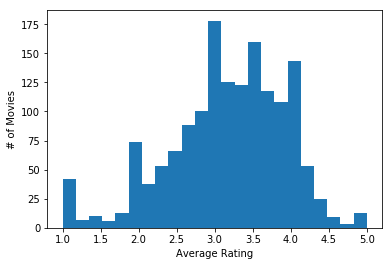

   movie_id                     movie title gender  ratingMale
0      1293                 Star Kid (1997)      M         5.0
1      1656              Little City (1998)      M         5.0
2      1122  They Made Me a Criminal (1939)      M         5.0


In [9]:
#male

averageMovieRatingMale = maleData.groupby(['movie_id','movie title','gender'])['rating'].mean().sort_values(ascending=False).reset_index()
averageMovieRatingMale.columns = ['movie_id','movie title','gender', 'ratingMale']
print('Histogram')
plt.hist(averageMovieRatingMale['ratingMale'],bins='auto')
plt.xlabel('Average Rating')
plt.ylabel('# of Movies')
plt.show()
bestRating = averageMovieRatingMale.head(3)
print(bestRating)

#1.2 לענות על הסיף בהתאם לתוצאות שיצאו לנו

## 1.2 


In [10]:
males_and_females_ratings = averageMovieRatingMale.merge(averageMovieRatingFemale,on="movie_id")
#print(males_and_females_ratings)
#print(males_and_females_ratings[['movie title_x','ratingMale','ratingFemale']])

difference_between_genders=males_and_females_ratings.apply(lambda row: (abs(row['ratingMale']-row['ratingFemale'])), axis=1)
difference_between_genders_df = pd.DataFrame({'movieid':difference_between_genders.index, 'difference':difference_between_genders.values})
#difference_between_genders["movieID"] = males_and_females_ratings["movie_id"].values
x = np.array(males_and_females_ratings["movie_id"].values)
y = np.array(difference_between_genders)
z = np.array(males_and_females_ratings["movie title_x"].values)
df = pd.DataFrame({'movieID':x,'movieTitle':z, 'res':y})
df.sort_values('res', inplace=True, ascending=False)
print('head')
print(df.head(5))

print(' tail')
print(df.tail(5))

print(' mean')
print(df['res'].mean())

head
    movieID                                   movieTitle       res
1      1175                             Hugo Pool (1997)  4.000000
7       851  Two or Three Things I Know About Her (1966)  3.666667
15     1429                         Sliding Doors (1998)  3.500000
16      641                        Paths of Glory (1957)  3.461538
50     1592                       Magic Hour, The (1998)  3.250000
 tail
      movieID                   movieTitle  res
164      1194    Once Were Warriors (1994)  0.0
1324     1289        Jack and Sarah (1995)  0.0
939       914           Wild Things (1998)  0.0
909        34  Doom Generation, The (1995)  0.0
945      1454  Angel and the Badman (1947)  0.0
 mean
0.5309060513841749


#1.3

In [11]:
m_cols = ['unknown','Action','Adventure','Animation','Childrens','Comedy',
          'Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi',
        'Thriller','War','Western']
def showPraph(m_cols,high_rated,title):
    
    genres_count = {}
    for g in m_cols:
        count = 0
        genre_movies = high_rated[g] == 1
        genres_count[g] = high_rated[genre_movies].shape[0]
    genres_count_list = sorted(genres_count.items(), key=operator.itemgetter(1),reverse=True)
    #print(genres_count_list)
    # lets display the same result in the histogram
    fig = plt.figure(1, figsize=(18,13))
    ax2 = fig.add_subplot(2,1,2)
    y_axis = [genres_count[i] for i in genres_count]
    x_axis = [i for i in range(len(genres_count))]
    x_label = [i for i in genres_count]
    plt.xticks(rotation=85, fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.xticks(x_axis, x_label)
    plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
    ax2.bar(x_axis, y_axis, align = 'center', color='r')
    plt.title(title,bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
    plt.show()

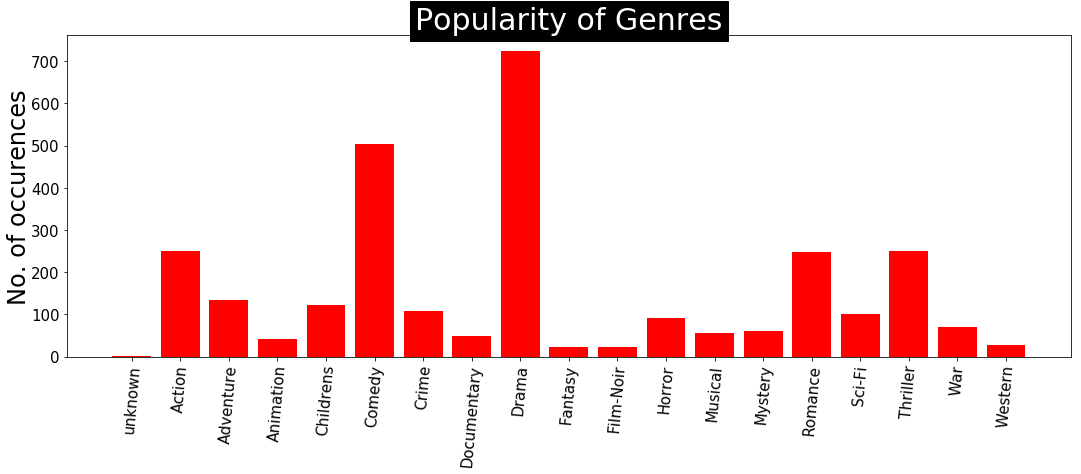

In [12]:
import operator
showPraph(m_cols,data,"Popularity of Genres")

**high rating > 4 male and female **

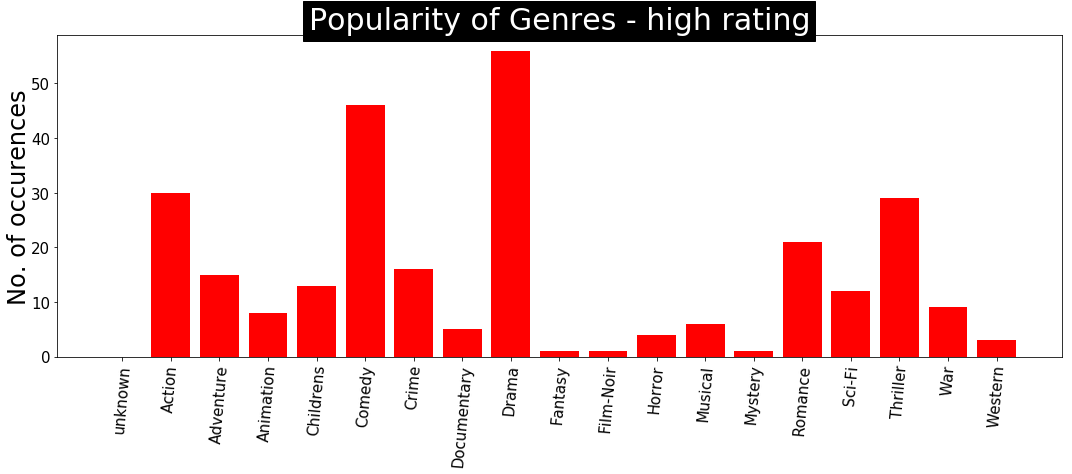

In [13]:
amit = pd.merge(averageMovieRating,data, left_index=True,right_on='movie_id', how='outer')
high_rated_indexes = amit['rating']>4.0
high_rated = amit[high_rated_indexes]
showPraph(m_cols,high_rated,"Popularity of Genres - high rating")

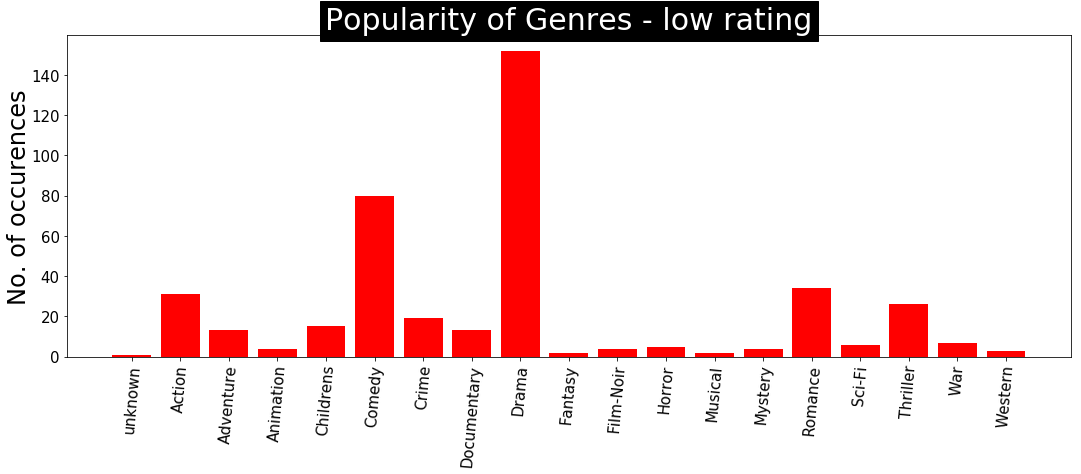

In [14]:
amit = pd.merge(averageMovieRating,data, left_index=True,right_on='movie_id', how='outer')
low_rated_indexes = amit['rating']<2.5
low_rated = amit[low_rated_indexes]
showPraph(m_cols,low_rated,"Popularity of Genres - low rating")

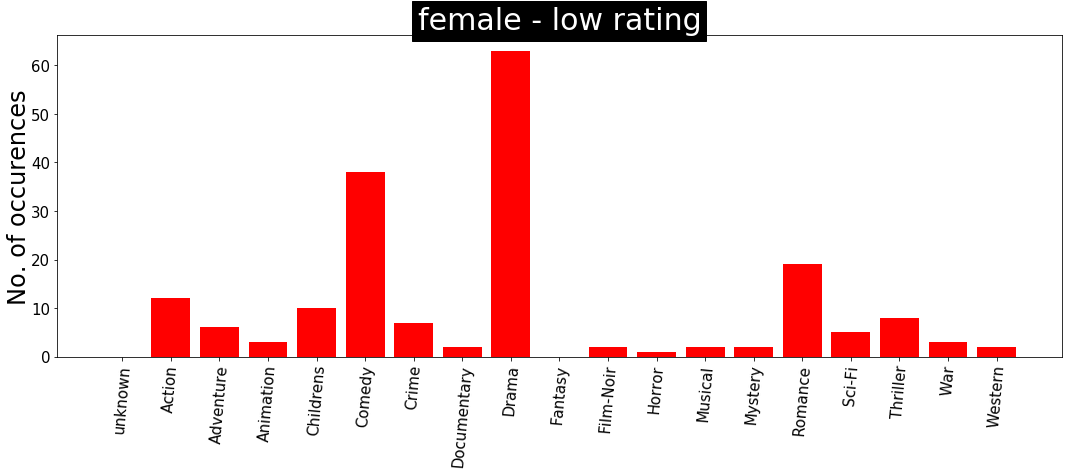

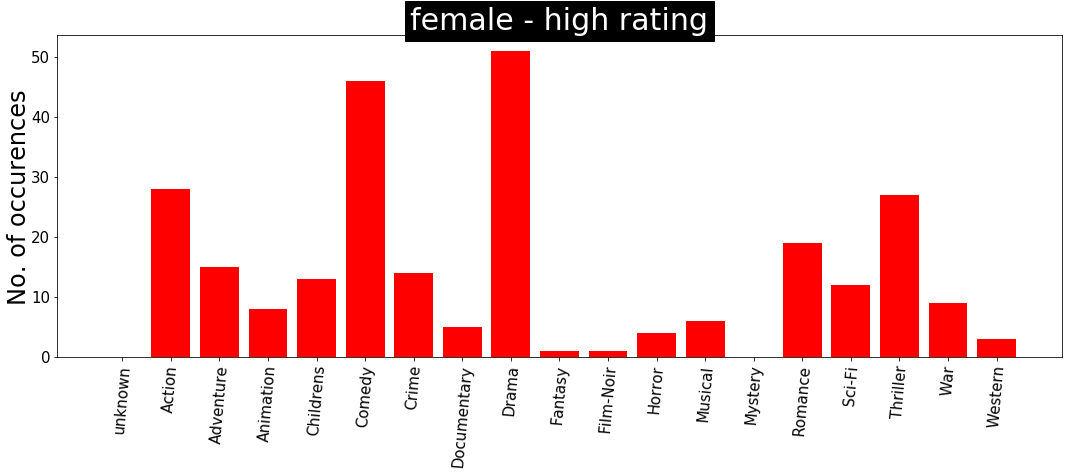

In [15]:

female_average_rating_genre=pd.merge(averageMovieRatingFemale,data, left_index=True,right_on='movie_id', how='inner')
#print(female_average_rating_genre)
low_rated_female_indexes1 = female_average_rating_genre['ratingFemale']<2.0
low_rated_female = female_average_rating_genre[low_rated_female_indexes1]
#print(low_rated_indexes1)
showPraph(m_cols,low_rated_female,"female - low rating")

high_rated_indexes1 = female_average_rating_genre['ratingFemale']>4.0
high_rated_female = female_average_rating_genre[high_rated_indexes1]
showPraph(m_cols,high_rated_female,"female - high rating")

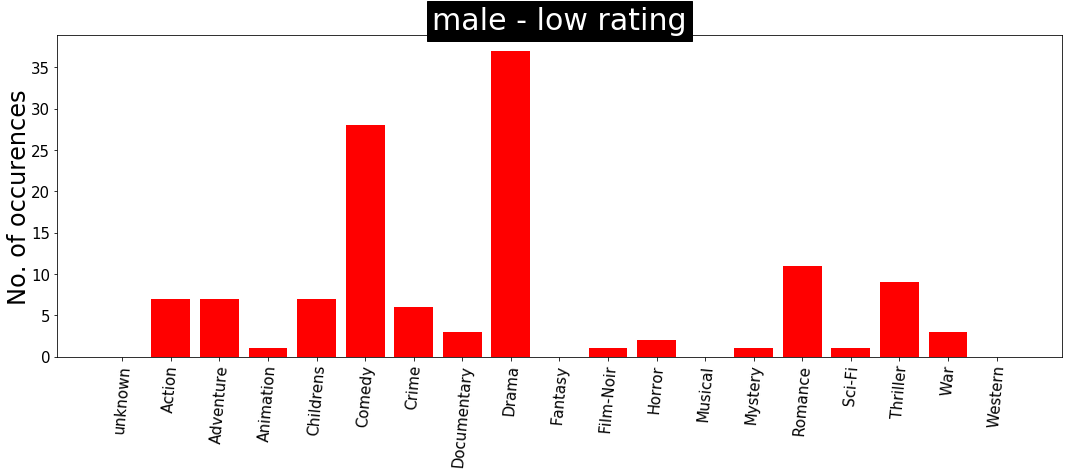

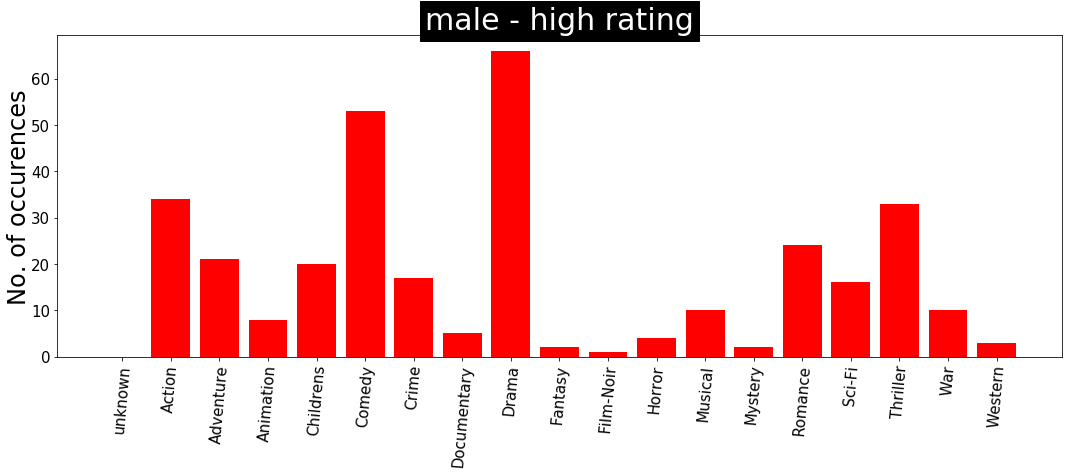

In [16]:
male_average_rating_genre=pd.merge(averageMovieRatingMale,data, left_index=True,right_on='movie_id', how='inner')
#print(female_average_rating_genre)
low_rated_male_indexes1 = male_average_rating_genre['ratingMale']<2.0
low_rated_male = male_average_rating_genre[low_rated_male_indexes1]
#print(low_rated_indexes1)
showPraph(m_cols,low_rated_male,"male - low rating")

high_rated_indexes1 = male_average_rating_genre['ratingMale']>4.0
high_rated_male = male_average_rating_genre[high_rated_indexes1]
showPraph(m_cols,high_rated_male,"male - high rating")

In [17]:
# check frequency and multipply mean movie rating question 1.4
count_rating_per_movie = data_r['movie_id'].value_counts()
ddd=dataRating.groupby(['movie_id', 'movie title'])['rating'].mean().sort_values(ascending=False)

count_rating_per_movie_df = pd.DataFrame({'movie_id':count_rating_per_movie.index, 'frequency':count_rating_per_movie.values})

count_with_rating = pd.merge(averageMovieRating, count_rating_per_movie_df, left_index=True, right_on='movie_id', how='inner')

x = np.array(count_with_rating["rating"].values*count_with_rating["frequency"].values)
#print(count_rating_per_movie_df['movie_id'])
#print(count_rating_per_movie_df)


q2.1

In [23]:
import numpy


In [24]:
def Prediction_by_movie_avg(movie_id):
    row = averageMovieRating[averageMovieRating['movie_id']==movie_id]
    if row.empty:
        return numpy.mean(averageMovieRating['rating'])
    else:
        return row.iloc[0]['rating']

In [25]:
test_cols = ['user_id','movie_id','rating','timestamp']
data_test = pd.read_csv('d:/documents/users/ravedan/Downloads/ml-100k/u1.test',delimiter='\t',names=test_cols,encoding='latin-1')
data_test.shape
#merging two dataframes movies and ratings
test_set=data.merge(data_test,on = 'movie_id',how = 'inner')
for index, row in test_set.iterrows():  
    test_set.set_value(index,'pridected_rating_by_movie_avg',Prediction_by_movie_avg(row['movie_id']))


In [26]:
test_set['dif_movie_avg_pridct_with_actual']=(test_set['rating']-test_set['pridected_rating_by_movie_avg']).abs()
mae_pridct_by_movie_avg=numpy.mean(test_set['dif_movie_avg_pridct_with_actual'])
print("MAE mthod 1: predicted by movie averge:",mae_pridct_by_movie_avg)


MAE mthod 1: predicted by movie averge: 0.8272262612291202


q2.2

In [55]:
# lets explore movies.csv
m_cols = ['movie_id','movie title','release date','video release date','IMDb URL'
          ,'unknown','Action','Adventure','Animation','Childrens','Comedy',
          'Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi',
        'Thriller','War','Western']
dataamit= pd.read_csv('d:/documents/users/ravedan/Downloads/ml-100k/u.item',delimiter='|',names=m_cols,encoding='latin-1')

In [176]:
from IPython.display import display
data_columns = ['user_id','movie_id','rating','timestamp']
base = pd.read_csv('d:/documents/users/ravedan/Downloads/ml-100k/u1.base',delimiter='\t',names=data_columns)
data1 = base.drop(['user_id', 'timestamp'], axis = 1)

#print(base)
data_by_item_id = data1.groupby(['movie_id'])
#print(data_by_item_id.mean())

mean_rating_per_item_id = data_by_item_id.mean().reset_index('movie_id').sort_values('rating', ascending=False)

#print(mean_rating_per_item_id)
columns_movies_recommandation = ['user_id','movie_id']
movies_to_recommand_average = pd.DataFrame(columns = columns_movies_recommandation)
#print(movies_to_recommand_average)
train_user_id_movie_id = base.drop(['rating', 'timestamp'], axis = 1)
test_unique_users = (data_test['user_id']).unique()
#print(test_unique_users)
for user_id in test_unique_users:
    rows_with_user_id = train_user_id_movie_id[train_user_id_movie_id['user_id'] == user_id]
    movies_wasnt_watched = mean_rating_per_item_id[~mean_rating_per_item_id.movie_id.isin(rows_with_user_id.movie_id)]
    top_20_movies_wasnt_watched = movies_wasnt_watched.head(20).drop(['rating'],axis=1)
    movies_to_recommand_average = movies_to_recommand_average.append(top_20_movies_wasnt_watched.assign(user_id = user_id))
print('top 20 movies with the best average rating for each user that this user havent seen already')
dataRating=dataamit.merge(movies_to_recommand_average,on = 'movie_id',how = 'inner')
#display(dataRating)
#print(dataRating.groupby(['user_id']).count())
amit=dataRating[['user_id','movie title']]
display(amit.sort_values('user_id',  ascending=True))
#print(movies_to_recommand_average)


top 20 movies with the best average rating for each user that this user havent seen already


,user_id,movie title
0,1.0,"Usual Suspects, The (1995)"
7770,1.0,Someone Else's America (1995)
7312,1.0,Everest (1998)
6853,1.0,Santa with Muscles (1996)
6395,1.0,"Saint of Fort Washington, The (1993)"
5939,1.0,Pather Panchali (1955)
5481,1.0,Faust (1994)
5023,1.0,Star Kid (1997)
8262,1.0,Some Mother's Son (1996)
4565,1.0,Marlene Dietrich: Shadow and Light (1996)


In [196]:
movies_to_recommand_random = pd.DataFrame(columns = columns_movies_recommandation)
for user_id in test_unique_users:
    rows_with_user_id = train_user_id_movie_id[train_user_id_movie_id['user_id'] == user_id]
    movies_wasnt_watched = mean_rating_per_item_id[~mean_rating_per_item_id.movie_id.isin(rows_with_user_id.movie_id)]
    top_20_movies_wasnt_watched = movies_wasnt_watched.sample(20).drop(['rating'],axis=1)
    movies_to_recommand_random = movies_to_recommand_random.append(top_20_movies_wasnt_watched.assign(user_id = user_id))
print('random 20 movies to recommand for each user which the user havent seen already:')
diei=dataamit.merge(movies_to_recommand_random,on = 'movie_id',how = 'inner')
amit=diei[['user_id','movie title']]
display(amit.sort_values('user_id',  ascending=True))

random 20 movies to recommand for each user which the user havent seen already:


,user_id,movie title
4336,1.0,Thirty-Two Short Films About Glenn Gould (1993)
2628,1.0,Lawrence of Arabia (1962)
4172,1.0,Milk Money (1994)
2886,1.0,Mary Shelley's Frankenstein (1994)
6482,1.0,Before the Rain (Pred dozhdot) (1994)
3881,1.0,Go Fish (1994)
6099,1.0,"Last Time I Saw Paris, The (1954)"
2963,1.0,Boxing Helena (1993)
6588,1.0,Guilty as Sin (1993)
7637,1.0,M. Butterfly (1993)


In [197]:
def get_movies_user_saw(user_id,data_test):
    return data_test[data_test["user_id"]==user_id]

In [198]:
def get_movies_user_reccoment_new(user_id,df):
    return df[df["user_id"]==user_id]

In [249]:
def calc_recall_and_precision(df,data_test):
    users_from_test_set=data_test.user_id.unique()
    results=pd.DataFrame(users_from_test_set,columns=['user_id'])
    for index, row in results.iterrows():
        s=get_movies_user_reccoment_new(row['user_id'],df)
        movies_user_actual_saw=get_movies_user_saw(row['user_id'],data_test)
        intersection = pd.merge(s, movies_user_actual_saw, how='inner', on=['movie_id'])
        #print(intersection)
        recall=len(intersection.index)/len(movies_user_actual_saw.index)
        results.set_value(index,'recall',recall)
        precision=len(intersection.index)/20;
        results.set_value(index,'precision',precision)
    return results

In [250]:
res_a = calc_recall_and_precision(movies_to_recommand_average,data_test)
mean_recall=numpy.mean(res_a['recall'])
print("recall:", mean_recall)
mean_precision=numpy.mean(res_a['precision'])
print("precision:", mean_precision)

recall: 0.022335341073397418
precision: 0.045860566448801855


In [251]:
res = calc_recall_and_precision(movies_to_recommand_random,data_test)
mean_recall1=numpy.mean(res['recall'])
print("recall random:", mean_recall1)
mean_precision1=numpy.mean(res['precision'])
print("precision random:", mean_precision1)

recall random: 0.009824611913904208
precision random: 0.02636165577342049


In [252]:
users_and_test_merged = data_test.merge(data_u,on='user_id')
female_data = users_and_test_merged[users_and_test_merged['gender'] == 'F']

female_data = female_data.drop([ 'rating', 'timestamp','age','gender','occupation','zip_code'], axis = 1)


In [253]:
movies_to_recommand_female = pd.DataFrame(columns = columns_movies_recommandation)
female_test_unique_users = (femaleData['user_id']).unique()
for user_id in female_test_unique_users:
    rows_with_user_id = train_user_id_movie_id[train_user_id_movie_id['user_id'] == user_id]
    movies_wasnt_watched = mean_rating_per_item_id[~mean_rating_per_item_id.movie_id.isin(rows_with_user_id.movie_id)]
    top_20_movies_wasnt_watched = movies_wasnt_watched.sample(20).drop(['rating'],axis=1)
    movies_to_recommand_female = movies_to_recommand_female.append(top_20_movies_wasnt_watched.assign(user_id = user_id))
print('random 20 movies to recommand for each user which the user havent seen already:')
diei=dataamit.merge(movies_to_recommand_female,on = 'movie_id',how = 'inner')
amit=diei[['user_id','movie title']]
display(amit.sort_values('user_id',  ascending=True))
#print(movies_to_recommand_female)


random 20 movies to recommand for each user which the user havent seen already:


,user_id,movie title
253,2.0,Jurassic Park (1993)
4762,2.0,"Stars Fell on Henrietta, The (1995)"
4243,2.0,Late Bloomers (1996)
1173,2.0,Black Sheep (1996)
4124,2.0,Bitter Moon (1992)
50,2.0,French Twist (Gazon maudit) (1995)
1580,2.0,Notorious (1946)
3669,2.0,I'm Not Rappaport (1996)
4936,2.0,Race the Sun (1996)
750,2.0,Mars Attacks! (1996)


In [254]:
#print(femaleData.user_id.unique())

res = calc_recall_and_precision(movies_to_recommand_female,data_test)
#print(res)
mean_recall1=numpy.mean(res['recall'])
print("recall female:", mean_recall1)
mean_precision1=numpy.mean(res['precision'])
print("precision female:", mean_precision1)

recall random: 0.0038434194136608064
precision random: 0.0076252723311546824


In [255]:
users_and_test_merged = data_test.merge(data_u,on='user_id')
male_data = users_and_test_merged[users_and_test_merged['gender'] == 'M']

male_data = male_data.drop([ 'rating', 'timestamp','age','gender','occupation','zip_code'], axis = 1)

In [256]:
movies_to_recommand_male = pd.DataFrame(columns = columns_movies_recommandation)
male_test_unique_users = (maleData['user_id']).unique()
for user_id in male_test_unique_users:
    rows_with_user_id = train_user_id_movie_id[train_user_id_movie_id['user_id'] == user_id]
    movies_wasnt_watched = mean_rating_per_item_id[~mean_rating_per_item_id.movie_id.isin(rows_with_user_id.movie_id)]
    top_20_movies_wasnt_watched = movies_wasnt_watched.sample(20).drop(['rating'],axis=1)
    movies_to_recommand_male = movies_to_recommand_male.append(top_20_movies_wasnt_watched.assign(user_id = user_id))
print('random 20 movies to recommand for each user which the user havent seen already:')
diei=dataamit.merge(movies_to_recommand_male,on = 'movie_id',how = 'inner')
amit=diei[['user_id','movie title']]
display(amit.sort_values('user_id',  ascending=True))
#print(movies_to_recommand_female)

random 20 movies to recommand for each user which the user havent seen already:


,user_id,movie title
9276,1.0,"Cowboy Way, The (1994)"
7828,1.0,Until the End of the World (Bis ans Ende der W...
4549,1.0,Rear Window (1954)
6594,1.0,April Fool's Day (1986)
12087,1.0,Kaspar Hauser (1993)
13076,1.0,Men With Guns (1997)
3819,1.0,My Left Foot (1989)
3133,1.0,E.T. the Extra-Terrestrial (1982)
8436,1.0,Joe's Apartment (1996)
9098,1.0,Palookaville (1996)


In [258]:

res = calc_recall_and_precision(movies_to_recommand_male,male_data)
#print(res)
mean_recall1=numpy.mean(res['recall'])
print("recall male:", mean_recall1)
mean_precision1=numpy.mean(res['precision'])
print("precision male:", mean_precision1)

recall female: 0.014543114867742115
precision female: 0.032164634146341464
